<h3> Let's import the required packages first</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h3> Data Wrangling</h3>

In [2]:
train = pd.read_csv('train.csv')
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


As we can see many values in the Product categories are NaN. Let's have a deeper look into the structure of the DataFrame.

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In the information we can see that product categories have lesser non-null entries than other columns.

In [4]:
train['Product_Category_1'].isnull().value_counts()

False    550068
Name: Product_Category_1, dtype: int64

Below we can see the Product_Category_2 column has many null observations.

In [5]:
train['Product_Category_2'].isnull().value_counts()

False    376430
True     173638
Name: Product_Category_2, dtype: int64

Here we can see that the non-null and null observations together make up the total entries

In [6]:
376430+173638

550068

In [7]:
train['Product_Category_3'].isnull().value_counts()

True     383247
False    166821
Name: Product_Category_3, dtype: int64

Even in the case of the column Product_Category_2 the null and non-null values together constitute the total number of observations.

In [8]:
383247+166821

550068

We can fill the null values as 0 because they were possibly not purchased during those transactions.

In [9]:
train.fillna(0, inplace=True)

In [10]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,6.735436,3.841941,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,6.215492,6.250712,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,0.000000,0.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,0.000000,0.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,5.000000,0.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,14.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null float64
Product_Category_3            550068 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


<h2>Quantitative EDA</h2>

In [12]:
train['Product_Category_1'].values.sum()

2972716

So the total number of Product category 1 sales is 2972716

In [13]:
train['Product_Category_2'].to_numpy().sum()

3704948.0

So the total number of Product category 2 sales is *3704948*

In [14]:
train['Product_Category_3'].to_numpy().sum()

2113329.0

So the total number of Product category 2 sales is 2113329

<h2>VISUAL EDA</h2>

<h4>We will plot various relations</h4>

<h4>The transactions by City</h4>

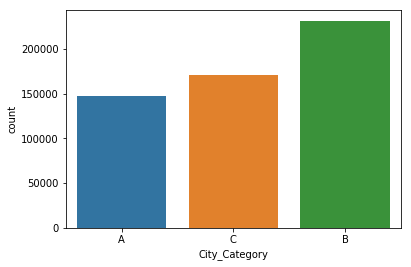

In [15]:
sns.countplot(train['City_Category'])

<h3>Average purchase by city</h3>

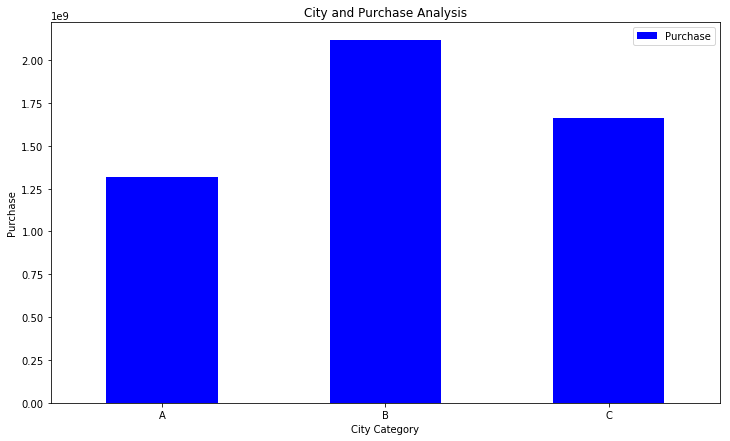

In [16]:
Occupation_pivot = train.pivot_table(index='City_Category', values="Purchase", aggfunc=np.sum)
Occupation_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("City Category")
plt.ylabel("Purchase")
plt.title("City and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

As we can see City B has the most transactions and City A has the least number of transactions among the 3. It has more purchase on an average

In [17]:
train.City_Category.value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

<h3>Transactions by Occupation</h3>

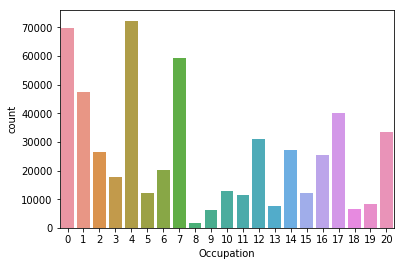

In [18]:
sns.countplot(train['Occupation'])

The people professing the occupation 4 are the most shopaholic.

<h3>Transactions by Age Category</h3>

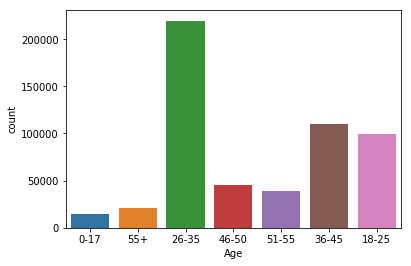

In [19]:
sns.countplot(train.Age)

The working population of 26-35 has the most transactions. So they are the most shopaholic of all.

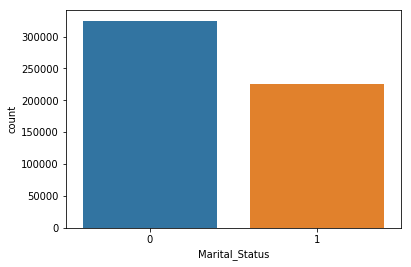

In [20]:
sns.countplot(train.Marital_Status)

<h4>Unmarried people are more likely to shop than married people.But this does not tell us about the amount of purchase.</h4>

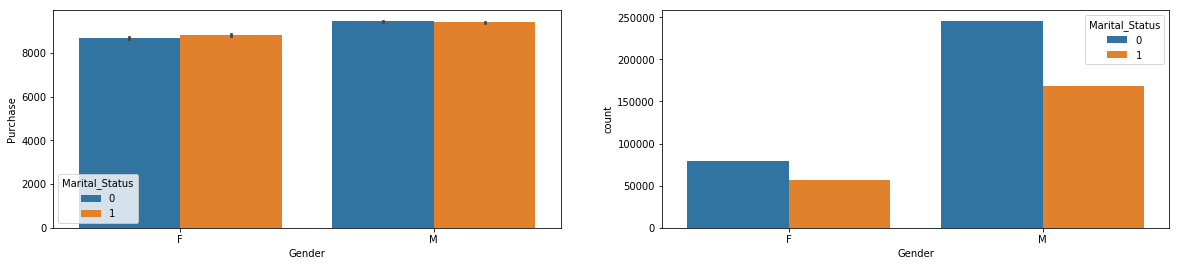

In [21]:
fig,ax = plt.subplots(figsize=(20,4),ncols=2,nrows=1)
sns.barplot(x="Gender",y="Purchase",hue="Marital_Status",estimator=np.mean, data=train,ax=ax[0])
sns.countplot(x="Gender",hue="Marital_Status", data=train, ax=ax[1])

Here we can see the buying patterns are not that Gender has more effect on the amount of purchase than marital status. As we can see men outnumber women a lot. However the average shows that men are more likely to spend more money than women.

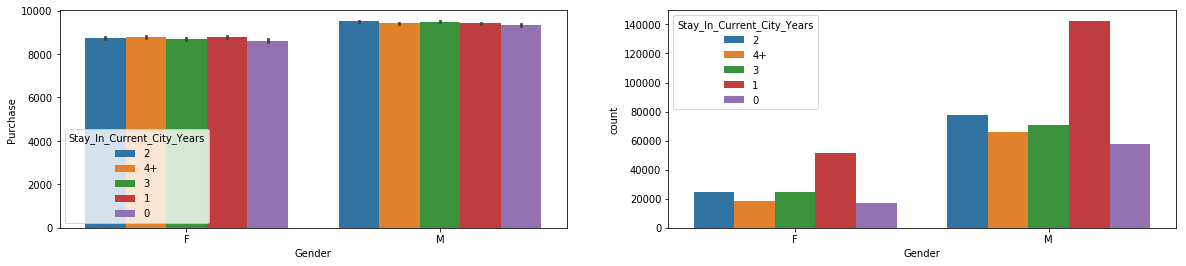

In [22]:
fig,ax = plt.subplots(figsize=(20,4),ncols=2,nrows=1)
sns.barplot(x="Gender",y="Purchase",hue="Stay_In_Current_City_Years",estimator=np.mean, data=train,ax=ax[0])
sns.countplot(x="Gender",hue="Stay_In_Current_City_Years", data=train, ax=ax[1])

In case of average purchase it does not matter how much time someone has spent in a respective city. However, the men staying in the 3 cities for 1 year outnumber everyone in terms of transactions made.

<h3>Let's confirm the previous finding with a different representation</h3>

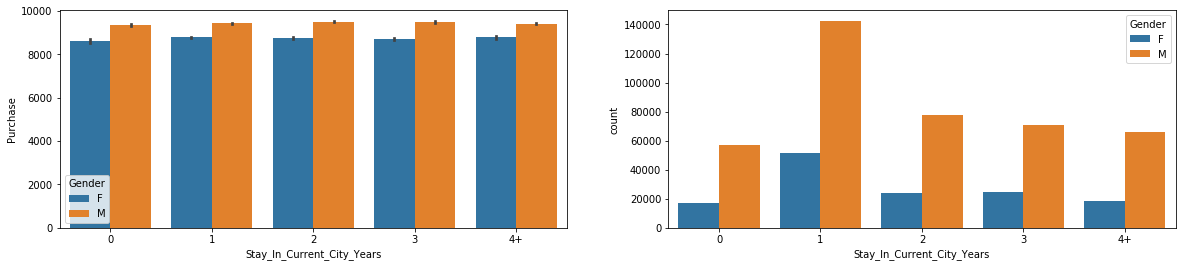

In [23]:
fig,ax = plt.subplots(figsize=(20,4),ncols=2,nrows=1)
sns.barplot(x="Stay_In_Current_City_Years",y="Purchase",hue="Gender",estimator=np.mean, data=train,ax=ax[0], 
            order = ["0","1","2","3","4+"])
sns.countplot(x="Stay_In_Current_City_Years",hue="Gender", data=train, ax=ax[1],order = ["0","1","2","3","4+"])

<h3>The 'Time Spent' vs purchase and transactions graphs by cities.</h3>

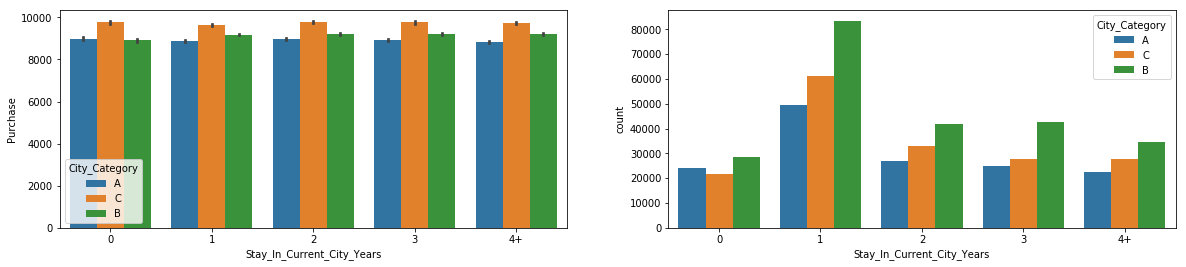

In [24]:
fig,ax = plt.subplots(figsize=(20,4),ncols=2,nrows=1)
sns.barplot(x="Stay_In_Current_City_Years",y="Purchase",hue="City_Category",estimator=np.mean, data=train,ax=ax[0], 
            order = ["0","1","2","3","4+"])
sns.countplot(x="Stay_In_Current_City_Years",hue="City_Category", data=train, ax=ax[1],order = ["0","1","2","3","4+"])

On an average the residents of city C have spent more among all the staying time categories.

But the number of transactions made by the residents outnumber those made by residents of the other categories.

<h2>Comparison among product categories</h2>

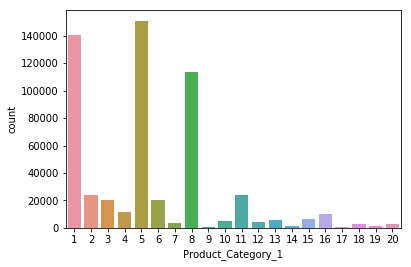

In [25]:
sns.countplot(train.Product_Category_1)

The products were bough mostly in batch sizes of 1,  5 and. 8 in the Product Category 1. There could be discounts such as buy one get one free or pack sizes. It seems as if it is a necessity product as everyone has bought something. It could be an FMCG.

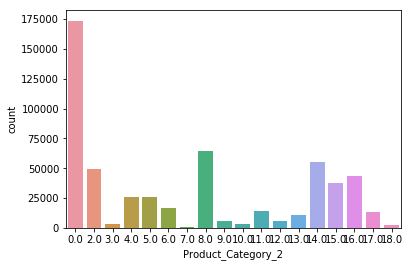

In [26]:
sns.countplot(train.Product_Category_2)

The products were bough mostly in batch sizes of 8, 14, 17 in the Product Category 2. There could be discounts such as buy one get one free.In most of transactions it was absent. It may be that it is a little inexpensive.

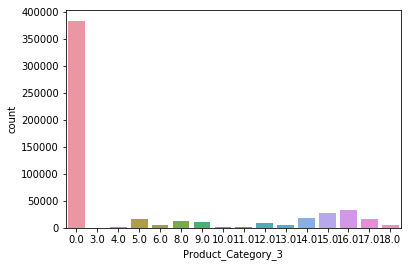

In [27]:
sns.countplot(train.Product_Category_3)

In the Product Category 3 the product labelled 0 is one outlier. It has too much of sales as compared to others. Here 0 means that the product was not bought in that particular transactions. Most of the people have bought it in large quantities. This could also be an FMCG commodity.

<h3>Now let's see the Purchase by Occupation and the variance as well. </h3>

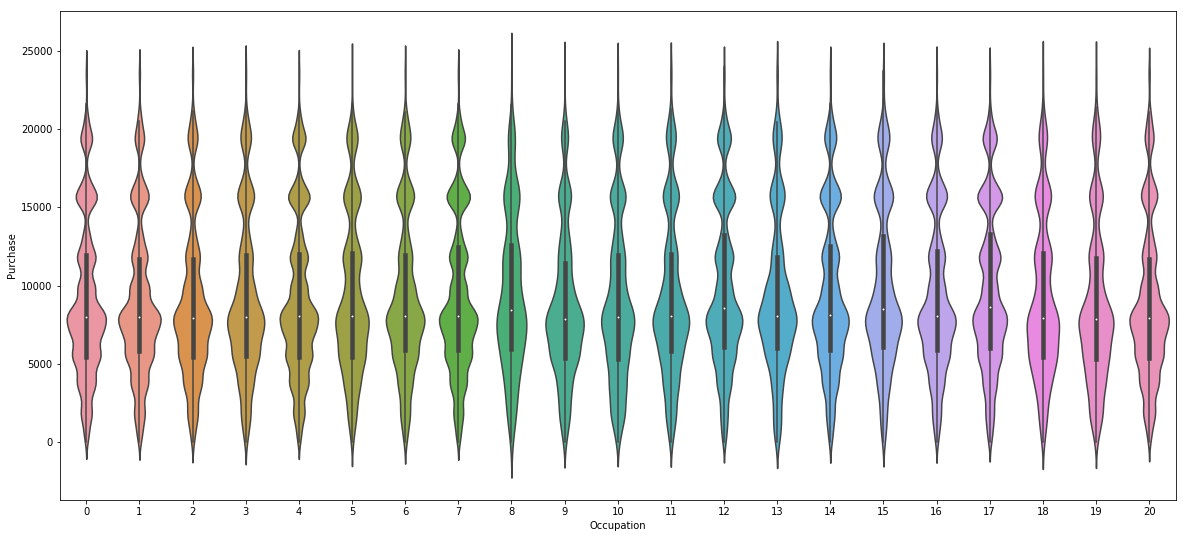

In [28]:
f, ax = plt.subplots(figsize=(20, 9))
sns.violinplot(x='Occupation', y='Purchase', data=train)

<h2>Buying patterns among different product categories by Age</h2>

Text(0.5, 1.0, 'Age vs Product Category 1')

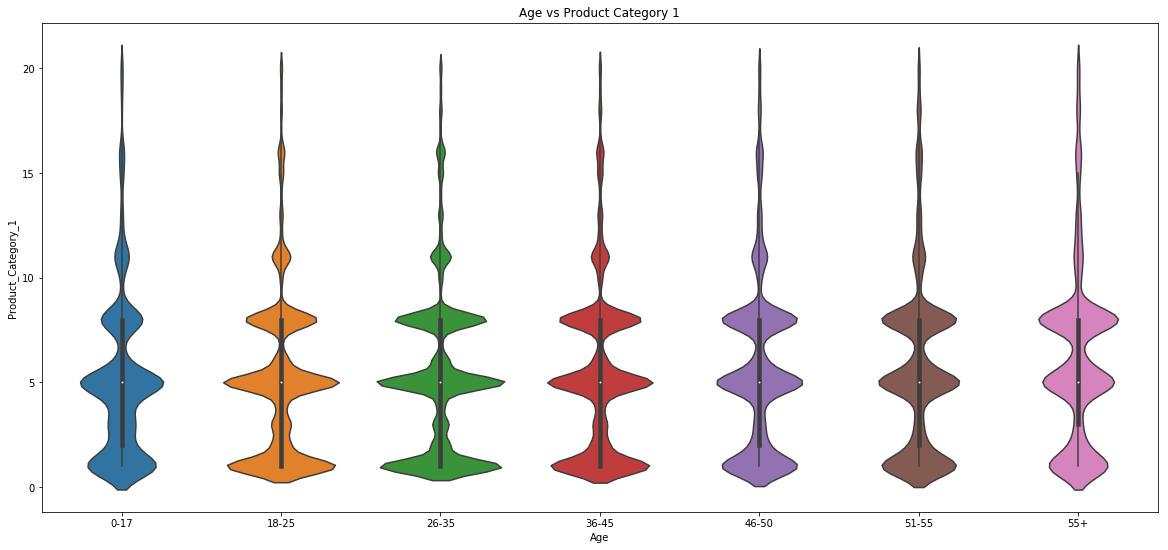

In [29]:
f, ax = plt.subplots(figsize=(20, 9))
sns.violinplot(x='Age', y='Product_Category_1', data=train, order=["0-17","18-25","26-35","36-45","46-50","51-55","55+"])
plt.title('Age vs Product Category 1')

The buying pattern for Product category 1 is almost similar in all age groups. Most people buy around 5 of them.

Text(0.5, 1.0, 'Age vs Product Category 2')

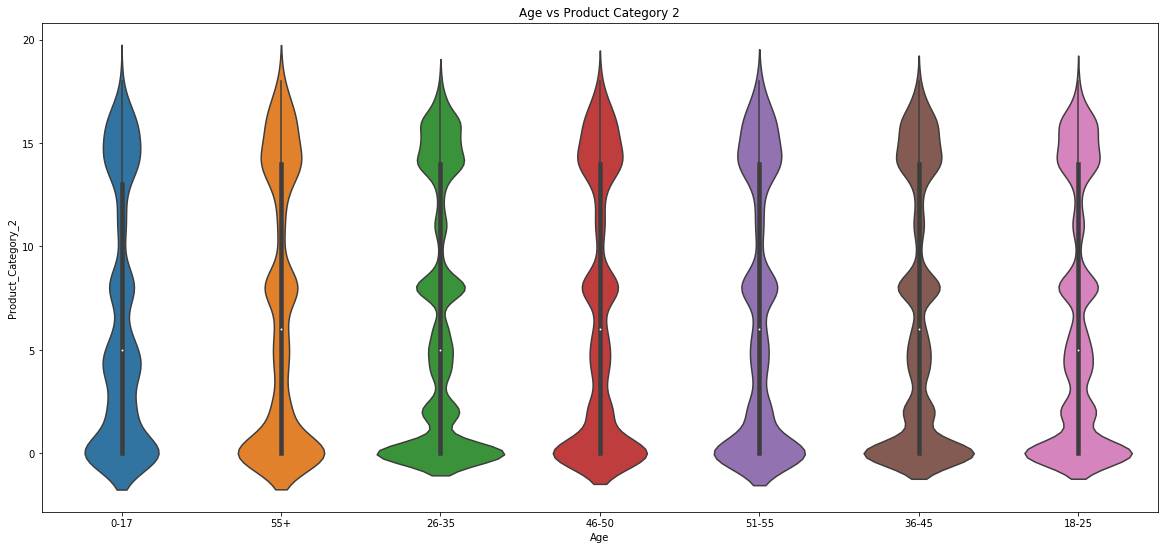

In [30]:
f, ax = plt.subplots(figsize=(20, 9))
sns.violinplot(x='Age', y='Product_Category_2', data=train)
plt.title('Age vs Product Category 2')

Text(0.5, 1.0, 'Age vs Product Category 3')

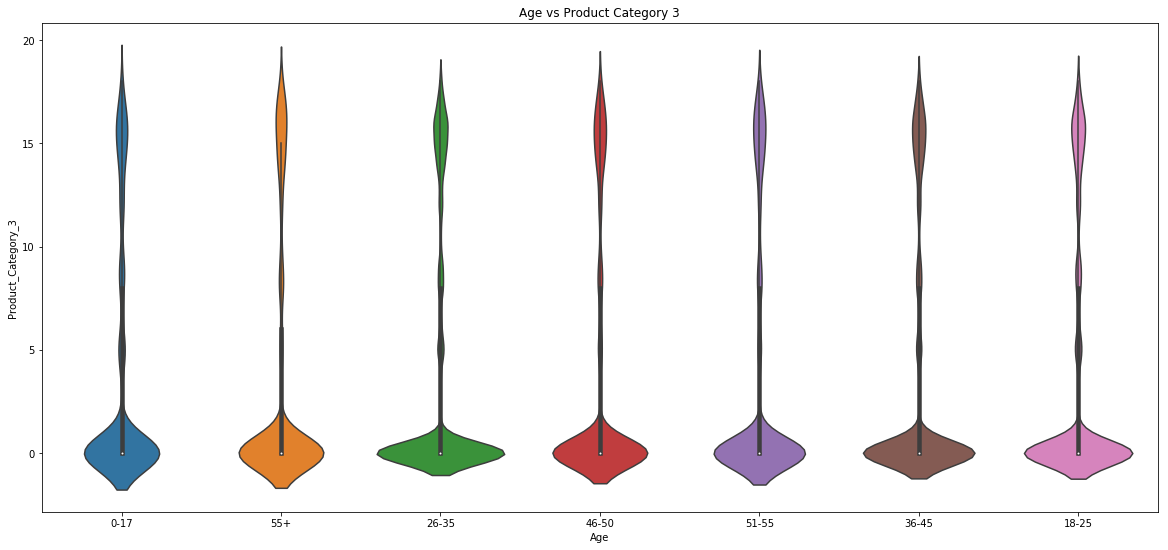

In [31]:
f, ax = plt.subplots(figsize=(20, 9))
sns.violinplot(x='Age', y='Product_Category_3', data=train)
plt.title('Age vs Product Category 3')

<h3>Buying patterns by Occupation and Occupations professed by different Genders.</h3>

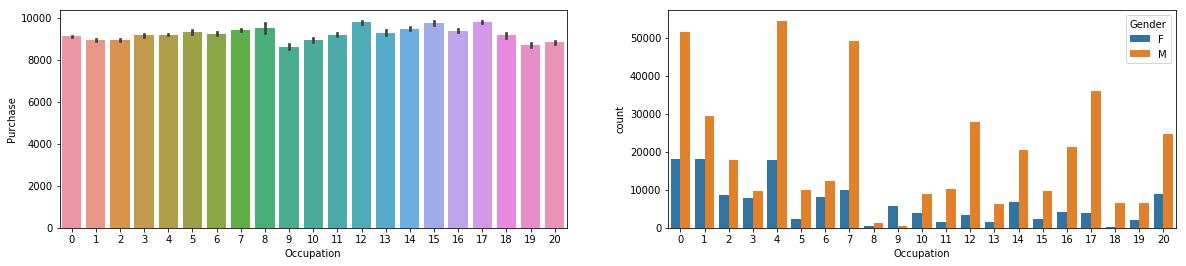

In [32]:
fig,ax = plt.subplots(figsize=(20,4),ncols=2,nrows=1)
sns.barplot(x="Occupation",y="Purchase",estimator=np.mean, data=train,ax=ax[0])
sns.countplot(x="Occupation",hue="Gender", data=train, ax=ax[1])

<h3>Product Category buying patterns by Occupation.</h3>

Text(0.5, 1.0, 'Occupation vs Product Category 1')

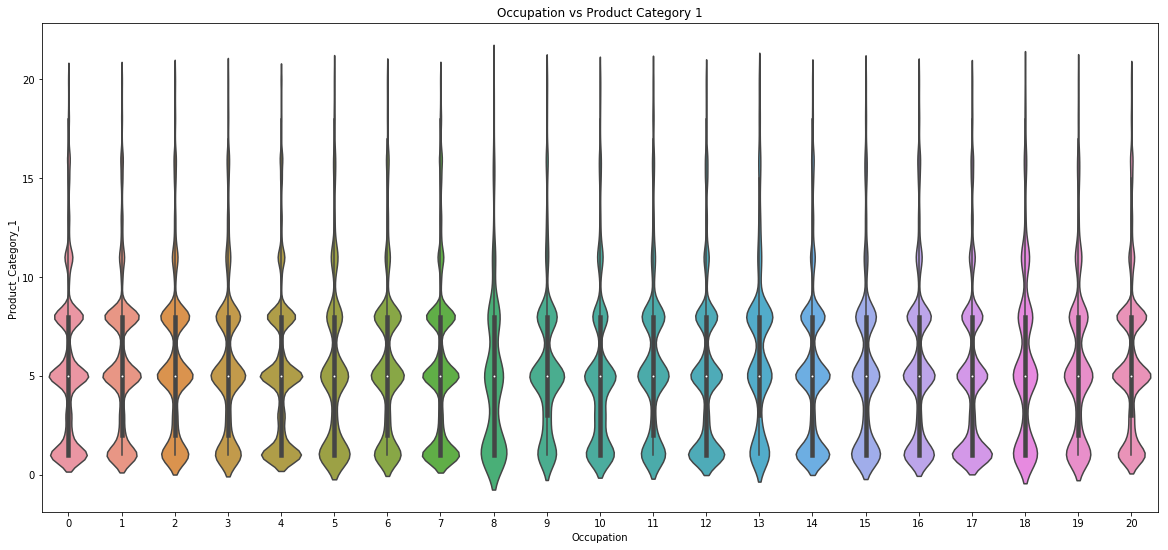

In [33]:
f, ax = plt.subplots(figsize=(20, 9))
sns.violinplot(x='Occupation', y='Product_Category_1', data=train)
plt.title('Occupation vs Product Category 1')

Text(0.5, 1.0, 'Occupation vs Product Category 2')

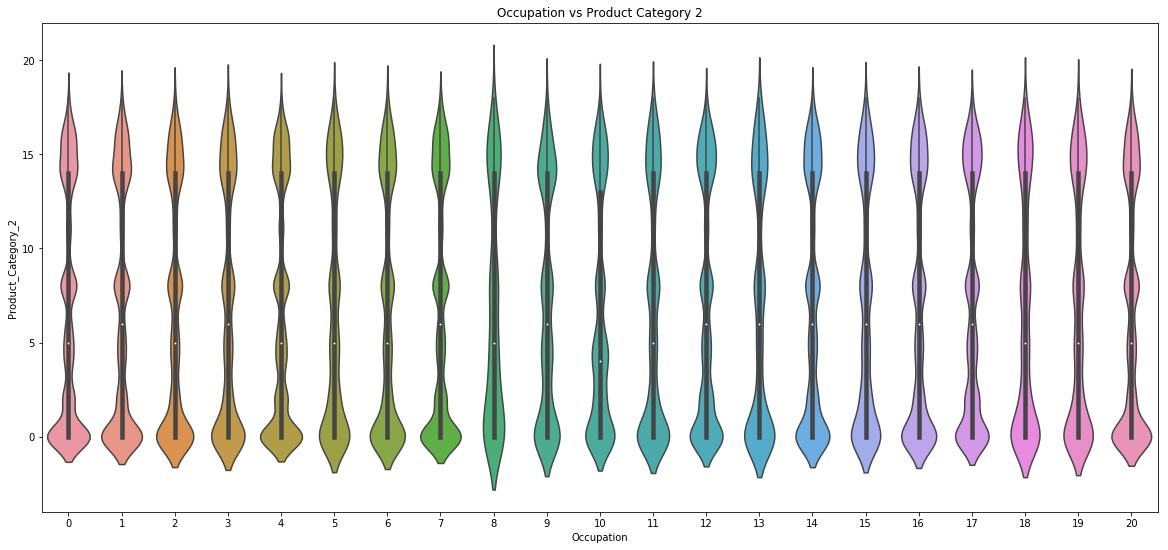

In [34]:
f, ax = plt.subplots(figsize=(20, 9))
sns.violinplot(x='Occupation', y='Product_Category_2', data=train)
plt.title('Occupation vs Product Category 2')

Text(0.5, 1.0, 'Occupation vs Product Category 3')

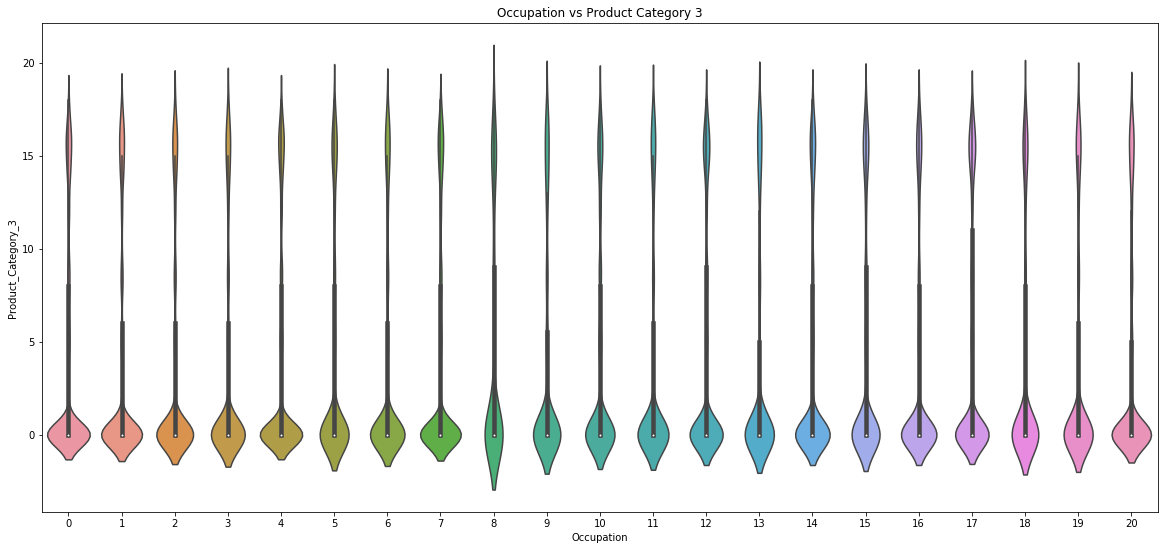

In [35]:
f, ax = plt.subplots(figsize=(20, 9))
sns.violinplot(x='Occupation', y='Product_Category_3', data=train)
plt.title('Occupation vs Product Category 3')

<h3>Transactions by Stay in City</h3>

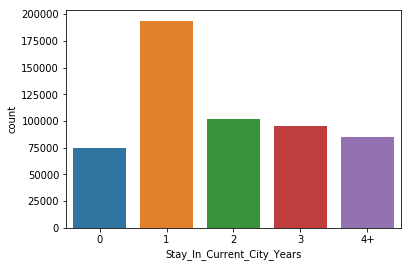

In [36]:
sns.countplot(train.Stay_In_Current_City_Years, order=['0','1','2','3','4+'])

Most of the people have moved in to the cities in the past one year.

Most purchases are made by people who have stayed for 1 year in their chosen cities.
City B is the most popular city for any  length of stay.

<h3>Transactions in different cities by different age groups.</h3>

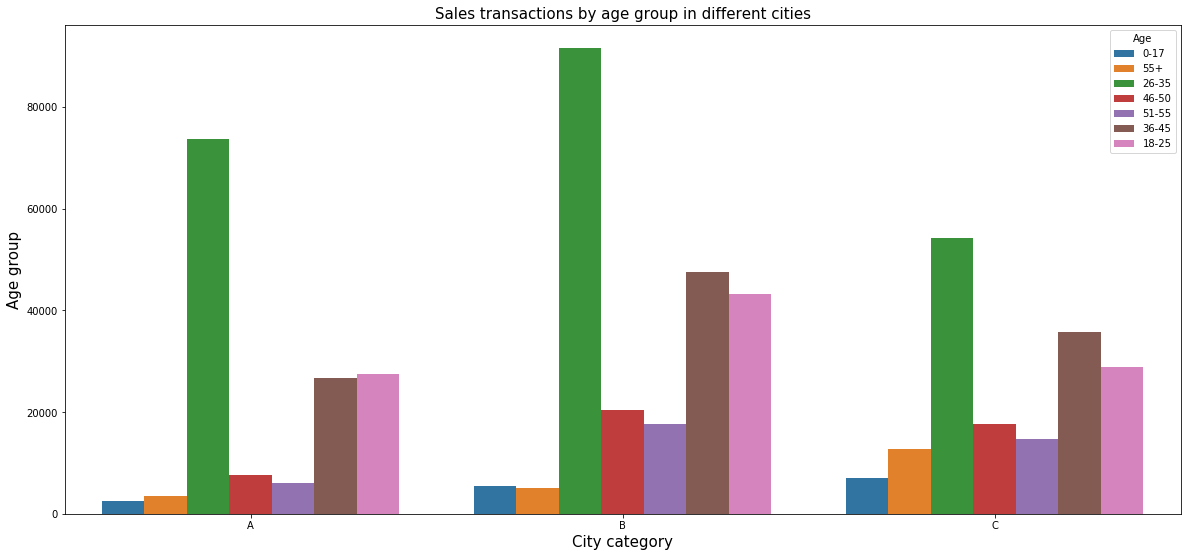

In [37]:
f, ax = plt.subplots(figsize=(20, 9))
sns.countplot(train["City_Category"],hue=train["Age"], order=['A','B','C'])
plt.ylabel("Age group", fontsize = 15)
plt.xlabel("City category", fontsize = 15)
plt.title("Sales transactions by age group in different cities", fontsize = 15)
plt.show()

The age group of 26-35 is the most active group in all the cities.

<h3>Occupation and average purchase analysis of the 3 product categories.</h3>

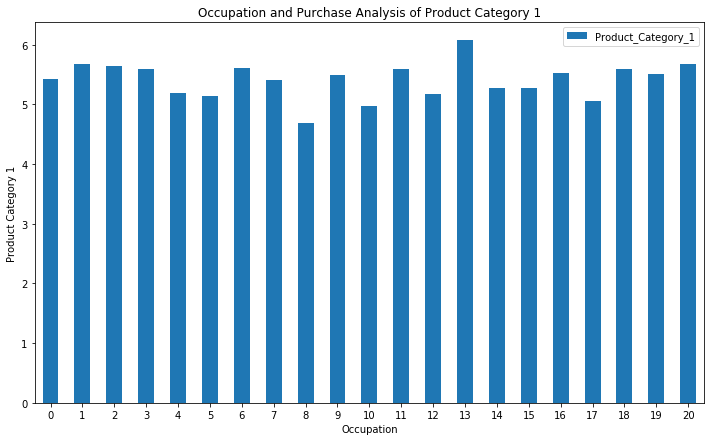

In [38]:
Occupation_pivot = \
train.pivot_table(index='Occupation', values="Product_Category_1", aggfunc=np.mean)
Occupation_pivot.plot(kind='bar', figsize=(12,7) )
plt.xlabel("Occupation")
plt.ylabel("Product Category 1")
plt.title("Occupation and Purchase Analysis of Product Category 1")
plt.xticks(rotation=0)
plt.show()

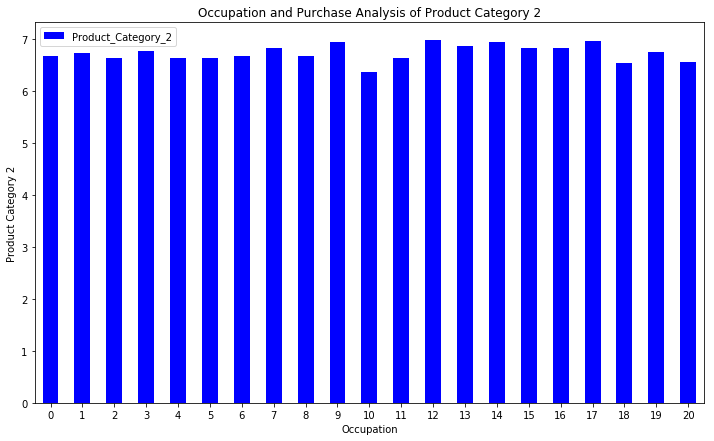

In [39]:
Occupation_pivot = \
train.pivot_table(index='Occupation', values="Product_Category_2", aggfunc=np.mean)
Occupation_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Occupation")
plt.ylabel("Product Category 2")
plt.title("Occupation and Purchase Analysis of Product Category 2")
plt.xticks(rotation=0)
plt.show()

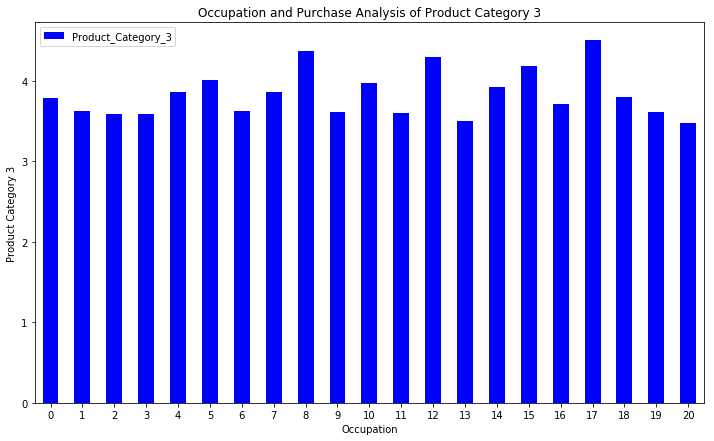

In [40]:
Occupation_pivot = \
train.pivot_table(index='Occupation', values="Product_Category_3", aggfunc=np.mean)
Occupation_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Occupation")
plt.ylabel("Product Category 3")
plt.title("Occupation and Purchase Analysis of Product Category 3")
plt.xticks(rotation=0)
plt.show()

<h3>Age and purchase analysis of differen product categories</h3>

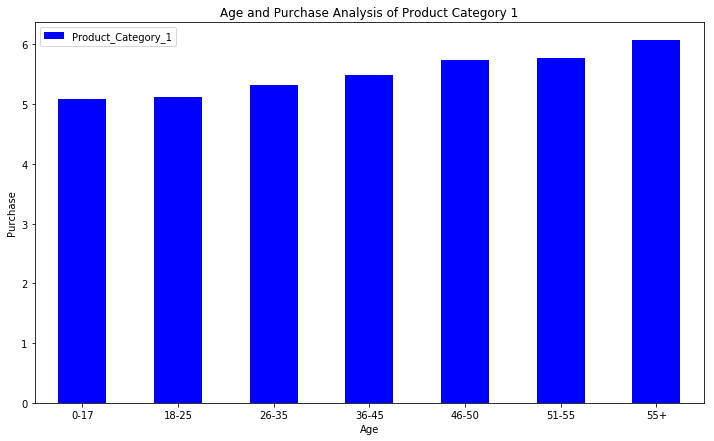

In [41]:
Occupation_pivot = \
train.pivot_table(index='Age', values="Product_Category_1", aggfunc=np.mean)
Occupation_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Age")
plt.ylabel("Purchase")
plt.title("Age and Purchase Analysis of Product Category 1")
plt.xticks(rotation=0)
plt.show()

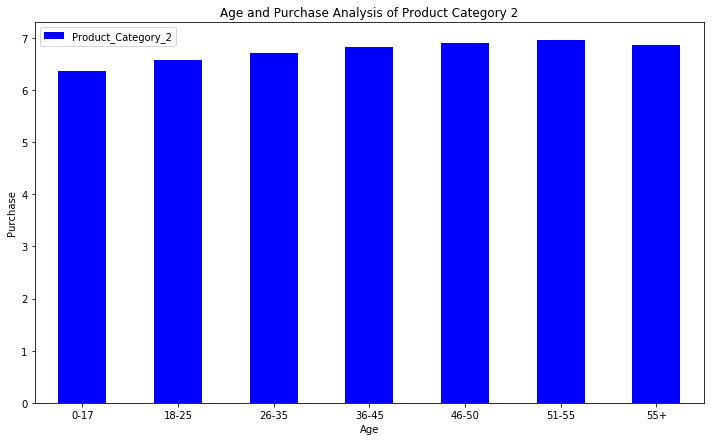

In [42]:
Occupation_pivot = \
train.pivot_table(index='Age', values="Product_Category_2", aggfunc=np.mean)
Occupation_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Age")
plt.ylabel("Purchase")
plt.title("Age and Purchase Analysis of Product Category 2")
plt.xticks(rotation=0)
plt.show()

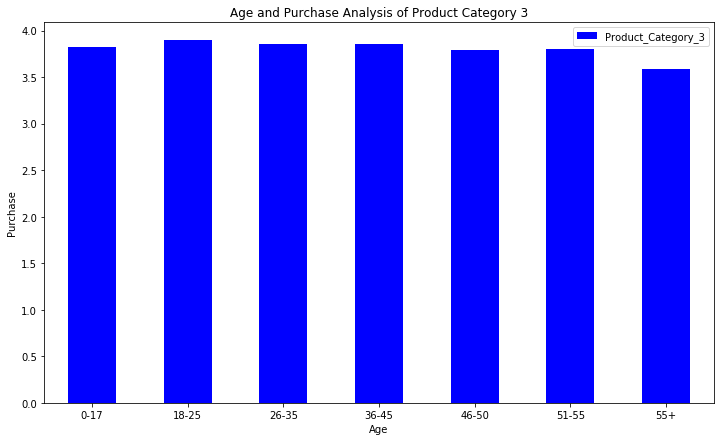

In [43]:
Occupation_pivot = \
train.pivot_table(index='Age', values="Product_Category_3", aggfunc=np.mean)
Occupation_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Age")
plt.ylabel("Purchase")
plt.title("Age and Purchase Analysis of Product Category 3")
plt.xticks(rotation=0)
plt.show()

<h3>A correlation heatmap for every numeric feature in the dataset.</h3>

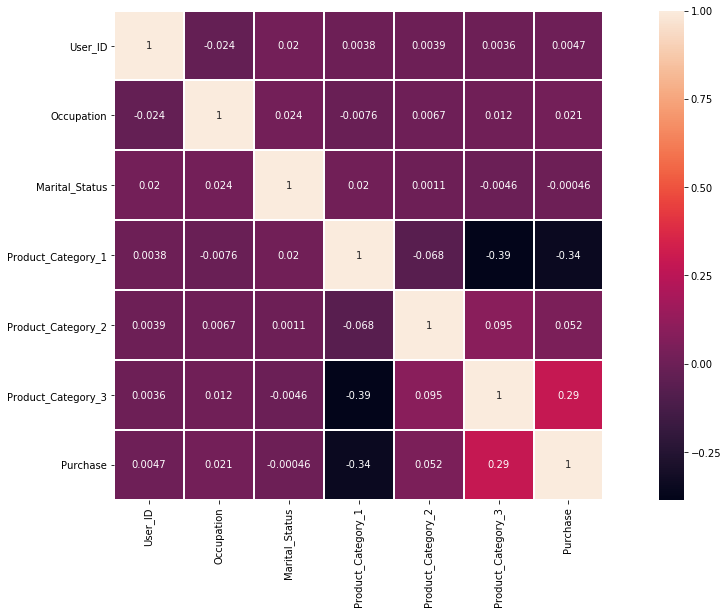

In [44]:
cor = train.select_dtypes(include='number').corr()

f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(cor, linewidths=1, annot=True, square=True)